In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats

In [18]:
df = pd.read_csv("/Users/oscargonzalezsanchez/Documents/ironhack/amz.csv")


In [19]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [20]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['BestSeller_Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
sorted_crosstab = crosstab.sort_values('BestSeller_Proportion', ascending=False)

print(sorted_crosstab)

isBestSeller                      False  True  BestSeller_Proportion
category                                                            
Grocery                            9008   556               0.058135
Smart Home Security & Lighting       98     6               0.057692
Health & Personal Care             9017   552               0.057686
Mobile Phone Accessories            248    11               0.042471
Power & Hand Tools                 8353   306               0.035339
...                                 ...   ...                    ...
CD, Disc & Tape Players            8798     0               0.000000
General Music-Making Accessories    259     0               0.000000
Snowboard Boots                    1449     0               0.000000
Boxes & Organisers                  911     0               0.000000
eBook Readers & Accessories         246     0               0.000000

[296 rows x 3 columns]


In [ ]:
# Grocery is the category where being a best-seller is more prevalent

In [24]:
# Chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab.iloc[:, :2])
print(f"Chi-square Test: chi2={chi2}, p={p}, dof={dof}")

# Cramér's V
n = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Chi-square Test: chi2=36540.20270061387, p=0.0, dof=295
Cramér's V: 0.08646706664522864


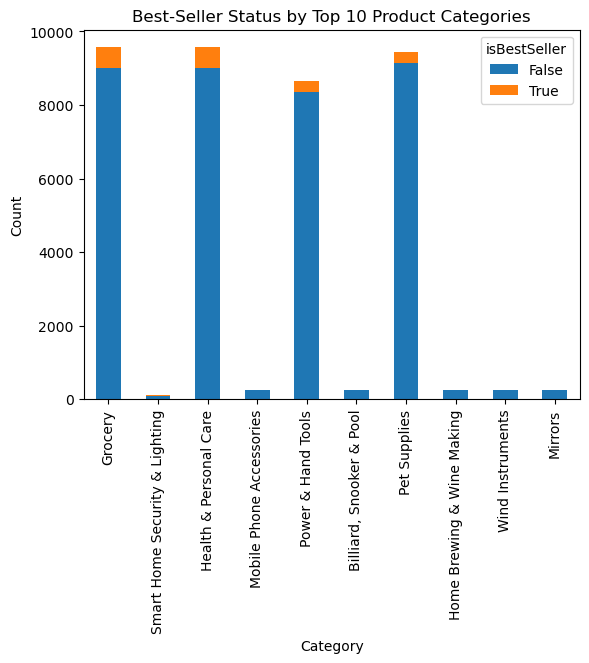

In [32]:
top_categories = crosstab.sort_values('BestSeller_Proportion', ascending=False).head(10)
top_categories.iloc[:, :2].plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Best-Seller Status by Top 10 Product Categories')
plt.show()

In [34]:
#PART 2
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Data without outliers:\n{df_no_outliers}")

Data without outliers:
             uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Clothing,

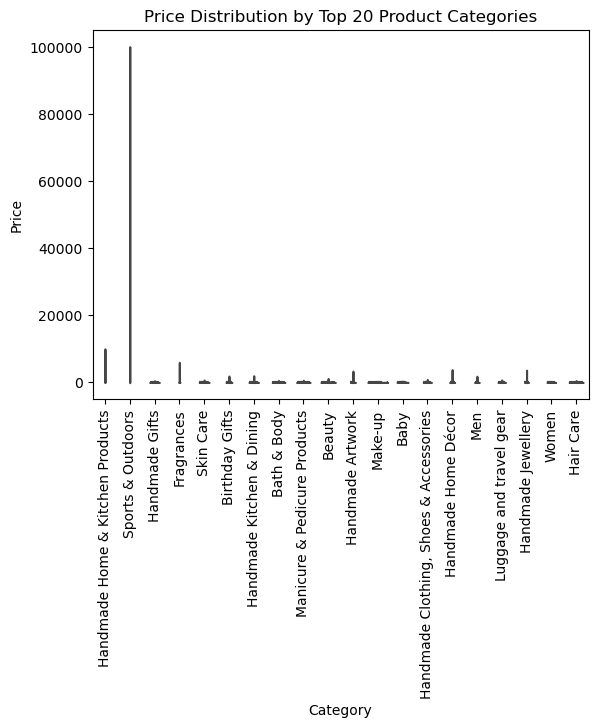

In [46]:
# Violin plot

# Calculate the count of products in each category
category_counts = df['category'].value_counts()

# Filter the top 20 categories based on count
top_20_categories = category_counts.head(20).index

# Filter the dataframe to include only the top 20 categories
df_top_20 = df[df['category'].isin(top_20_categories)]

# Violin plot for the top 20 categories by count
sns.violinplot(x='category', y='price', data=df_top_20, inner="quartile")
plt.xticks(rotation=90)
plt.title('Price Distribution by Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

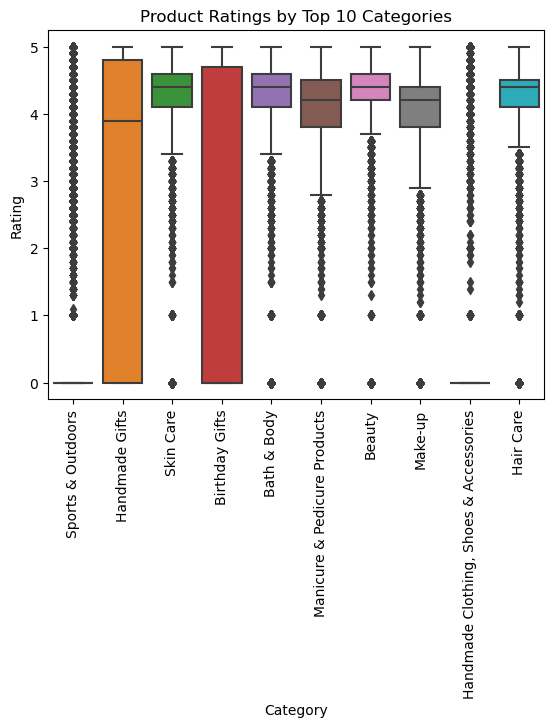

In [52]:
# Box plot for product ratings by category

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calculate the count of products in each category
category_counts = df_no_outliers['category'].value_counts()

# Filter the top 10 categories based on count
top_10_categories = category_counts.head(10).index

# Filter the dataframe to include only the top 10 categories
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Box plot for the top 10 categories by count

sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)
plt.title('Product Ratings by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [58]:
# Calculate the correlation coefficient
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation coefficient between price and stars: {correlation_coefficient}")


Correlation coefficient between price and stars: -0.07767299878181444


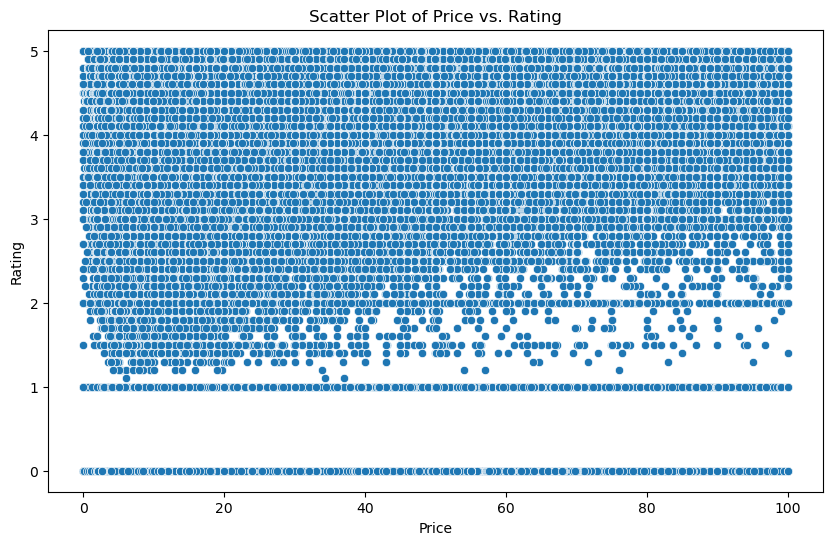

In [60]:
# Scatter plot for price vs. stars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_no_outliers)
plt.title('Scatter Plot of Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

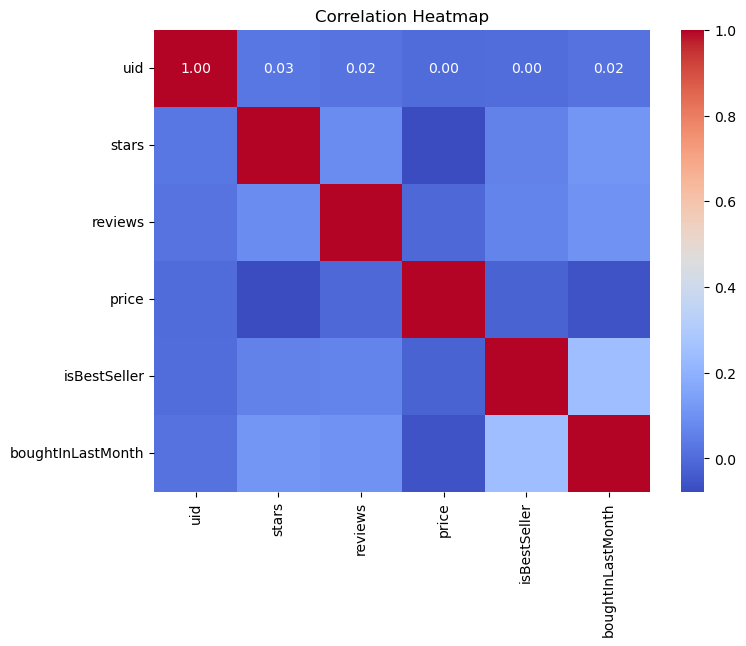

In [64]:
# Select only the numeric columns for correlation calculation
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64', 'bool'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


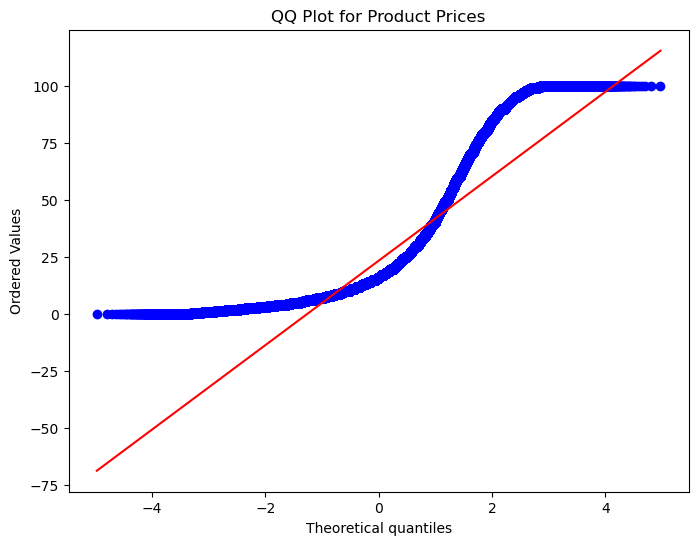

In [66]:
# QQ plot for product prices
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()